<a href="https://colab.research.google.com/github/Daniii-sudo/IA-DGM/blob/main/U2/Perceptr%C3%B3n_DatosPersonales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

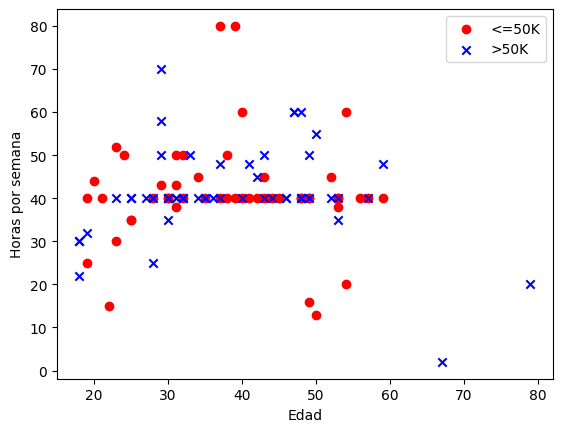

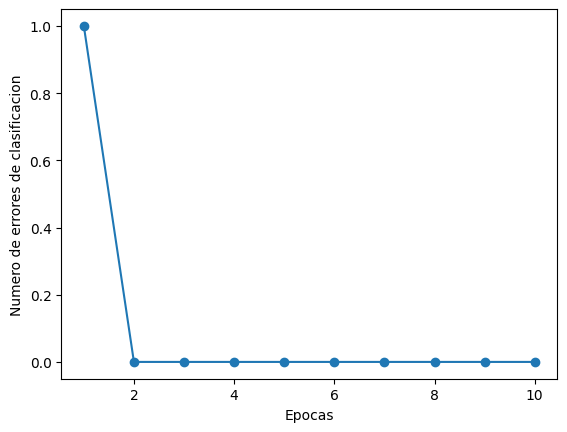

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# clase del perceptron
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)





# dataset desde la URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#arreglo de nombres
nombres_columnas = [
    'edad', 'clase de trabajo', 'ponderación ', 'educación', 'número de educación',
    'estado civil', 'ocupación', 'relación', 'raza',
    'sexo', 'ganancia de capital', 'perdida de capital', 'horas por semana',
    'país de origen', 'ingreso'
    ]

# se carga en un dataframe, se asignan los nombres de las columnas, se usa delimitador que indica que
# las columnas estan separadas por una coma y que puede haber espacio despues de una coma
# se usa el motor de python para este caso del delimitador
df = pd.read_csv(url, names=nombres_columnas, sep=',\s*', engine='python')


# convertir la columna ingreso en clases -1 (<=50K) y 1 (>50K)
y = np.where(df['ingreso'] == ' <=50K', -1, 1)



# caracteristicas (edad y horas por semana)
X = df.loc[0:100, ['edad', 'horas por semana']].values



# graficar los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='<=50K')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='>50K')
plt.xlabel('Edad')
plt.ylabel('Horas por semana')
plt.legend(loc='upper right')
plt.show()



# Entrenamiento del perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)



# graficar errores por epoca
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Numero de errores de clasificacion')
plt.show()
